In [15]:
import pandas as pd
import math

In [79]:
df_s=pd.read_csv('with_sentiment.csv')
df_m=pd.read_csv('M_sen_views.csv')

In [117]:
a=df_s.groupby('title')[['bot']].count()
b=df_s.groupby('title')[['bot']].sum()

In [118]:
df_1=b/a

In [119]:
df_1['new_score']=df_1['bot'].apply(lambda x: -math.log(x+1)+1)

In [120]:
df_f=df_1.merge(df_m,on='title')

In [121]:
df_ff=df_f[df_f['M']>0]

In [122]:
df_bot=df_s[df_s['bot']]


In [114]:
idex=df_bot[df_bot['comment'].str.contains('date').fillna(False)].index
df_bot[df_bot['comment'].str.contains('date').fillna(False)]

,Unnamed: 0,date,revert,edit,commentor,title,comment,Revision Time,views,sentiment_score,bot
1,1,2009-12-27 18:23:24,0.0,5.0,SmackBot,Peasenhall_Murder,/* Parody usage */Delink dates ([[WP:MOSUNLINK...,243,41821.0,0.0,True
5,5,2008-12-29 23:45:27,0.0,2.0,Lightbot,Kannambra-I,Units/dates/other,69,4531.0,0.0,True
6,6,2009-12-23 19:53:02,0.0,69.0,SmackBot,Princess_DisneyMania,Delink dates ([[WP:MOSUNLINKDATES]]) using [[P...,119,20524.0,0.0,True
7,7,2009-12-23 20:43:25,0.0,8.0,SmackBot,Rare_&_Unreleased_Recordings_from_the_Golden_R...,Delink dates ([[WP:MOSUNLINKDATES]]) using [[P...,270,25698.0,0.0,True
8,8,2008-09-18 01:00:38,0.0,4.0,Lightbot,Adolphe-Simon_Neboux,Units/dates/other,52,6621.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
15100,15100,2009-12-27 18:02:49,0.0,89.0,SmackBot,Joe_Randa,Delink dates ([[WP:MOSUNLINKDATES]]) using [[P...,38,48396.0,0.0,True
15101,15101,2009-12-24 00:07:04,0.0,1298.0,SmackBot,hai_Airways_International,Delink dates ([[WP:MOSUNLINKDATES]]) using [[P...,273,NaN,0.0,True
15107,15107,2009-12-24 00:07:04,0.0,3705.0,SmackBot,he_White_Stripes,Delink dates ([[WP:MOSUNLINKDATES]]) using [[P...,273,NaN,0.0,True
15109,15109,2008-09-18 14:40:49,0.0,78.0,Lightbot,Edgar_of_Scotland,Units/dates/other,61,42337.0,0.0,True


In [116]:
df_s =df_s.drop(idex)

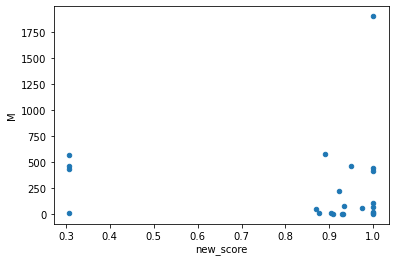

In [123]:
df_ff[df_ff['M']<10000].plot(x='new_score',y='M',kind='scatter')